<a href="https://colab.research.google.com/github/rodrigo8502/project5/blob/main/aplicativos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



## Carga do Dataset

In [4]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/googleplaystore.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
# Mostra as dimensões do dataset (linhas, colunas)
print(f"Total de instâncias (linhas): {dataset.shape[0]}")
print(f"Total de atributos (colunas): {dataset.shape[1]}")

print("\nTipos de dados por coluna:")
print(dataset.info())



Total de instâncias (linhas): 10841
Total de atributos (colunas): 14

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB
None


In [6]:
dataset.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [7]:
dataset.shape

(10841, 14)

In [8]:
# Ordena o DataFrame por 'Installs' e mostra os 5 primeiros
top_5_installs = dataset.sort_values(by='Installs', ascending=False).head(10)
print("\n--- 5 Aplicativos com Mais Instalações ---")
print(top_5_installs[['App', 'Category', 'Installs']])


--- 5 Aplicativos com Mais Instalações ---
                                               App            Category  \
10472      Life Made WI-Fi Touchscreen Photo Frame                 1.9   
420    UC Browser - Fast Download Private & Secure       COMMUNICATION   
474                    LINE: Free Calls & Messages       COMMUNICATION   
3767                  Flipboard: News For Our Time  NEWS_AND_MAGAZINES   
3574                                   Cloud Print        PRODUCTIVITY   
3326                  Gboard - the Google Keyboard               TOOLS   
431                                Viber Messenger       COMMUNICATION   
4222                 imo free video calls and chat       COMMUNICATION   
3235                              Google Translate               TOOLS   
1842                              Candy Crush Saga                GAME   

           Installs  
10472          Free  
420    500,000,000+  
474    500,000,000+  
3767   500,000,000+  
3574   500,000,000+  
3326   50

In [9]:
# Convertendo a coluna 'Reviews' para numérico, caso não esteja
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'])

# Ordena o DataFrame por 'Reviews' e mostra os 5 primeiros
top_5_reviews = dataset.sort_values(by='Reviews', ascending=False).head(5)
print("\n--- 5 Aplicativos com Mais Avaliações ---")
print(top_5_reviews[['App', 'Category', 'Reviews']])

ValueError: Unable to parse string "3.0M" at position 10472


--- Distribuição de Categorias (Contagem) ---
Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                 

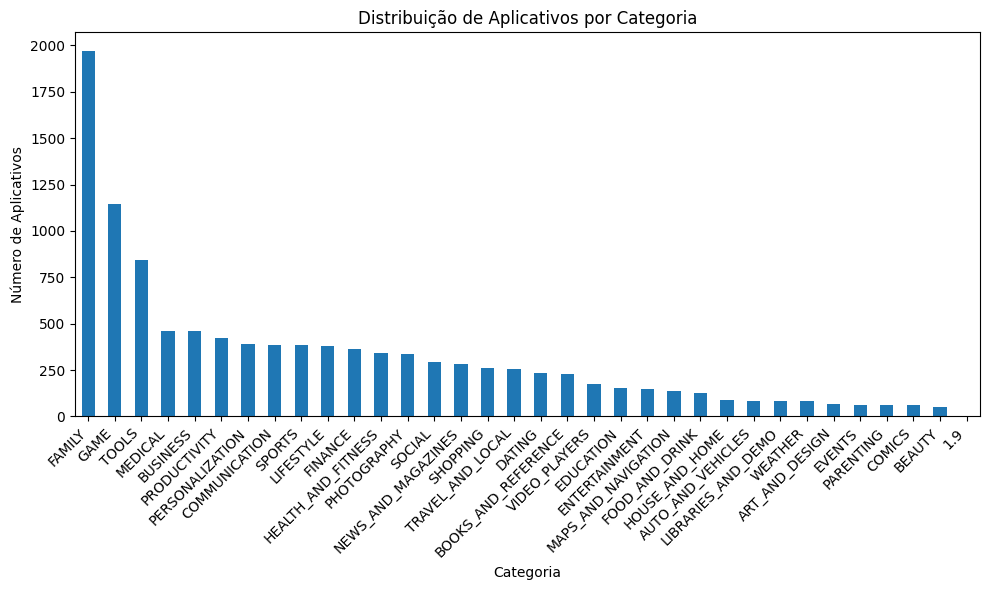

In [10]:
# Contando o número de aplicativos em cada categoria
contagem_categorias = dataset['Category'].value_counts()

print("\n--- Distribuição de Categorias (Contagem) ---")
print(contagem_categorias)

# Para visualizar essa distribuição de forma gráfica, você pode usar a biblioteca matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
contagem_categorias.plot(kind='bar')
plt.title('Distribuição de Aplicativos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Aplicativos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

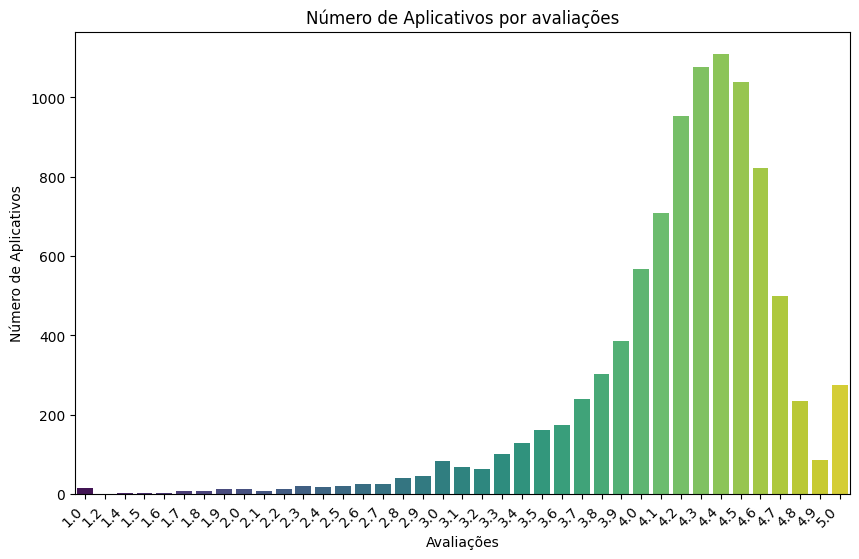

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=dataset, palette='viridis')
plt.title('Número de Aplicativos por avaliações')
plt.xlabel('Avaliações')
plt.ylabel('Número de Aplicativos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtrando o jogo com o nome 'Mario Kart Wii'
jogo_desejado = dataset[dataset['Category'] == 'Medical']
print(jogo_desejado)

Empty DataFrame
Columns: [Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [ ]:
# Filtrando jogos do gênero de esporte
jogos_de_esporte = dataset[dataset['Genre'] == 'Sports']
print(jogos_de_esporte)

KeyError: 'Genre'

In [15]:
dataset.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [16]:
# média dos atributos numéricos do dataset
print("\nMédia dos atributos numéricos:")
print(dataset.describe().loc['mean'])




Média dos atributos numéricos:
Unnamed: 0    5420.000000
Rating           4.193338
Name: mean, dtype: float64


In [ ]:
# desvio padrão dos atributos numéricos do dataset
print("\nDesvio padrão dos atributos numéricos:")
print(dataset.describe().loc['std'])




Desvio padrão dos atributos numéricos:
Unnamed: 0    3129.671468
Rating           0.537431
Name: std, dtype: float64


In [17]:
print(dataset.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
# Contando a quantidade de cada classe
value_counts = dataset['Global_Sales'].value_counts()

# Filtrando as classes com mais de 1 ocorrência
classes_to_keep = value_counts[value_counts > 1].index

# Filtrando o DataFrame para manter apenas as classes que aparecem mais de uma vez
dataset_filtered = dataset[dataset['Global_Sales'].isin(classes_to_keep)]

# Exibindo o DataFrame filtrado
print(dataset_filtered)


KeyError: 'Global_Sales'

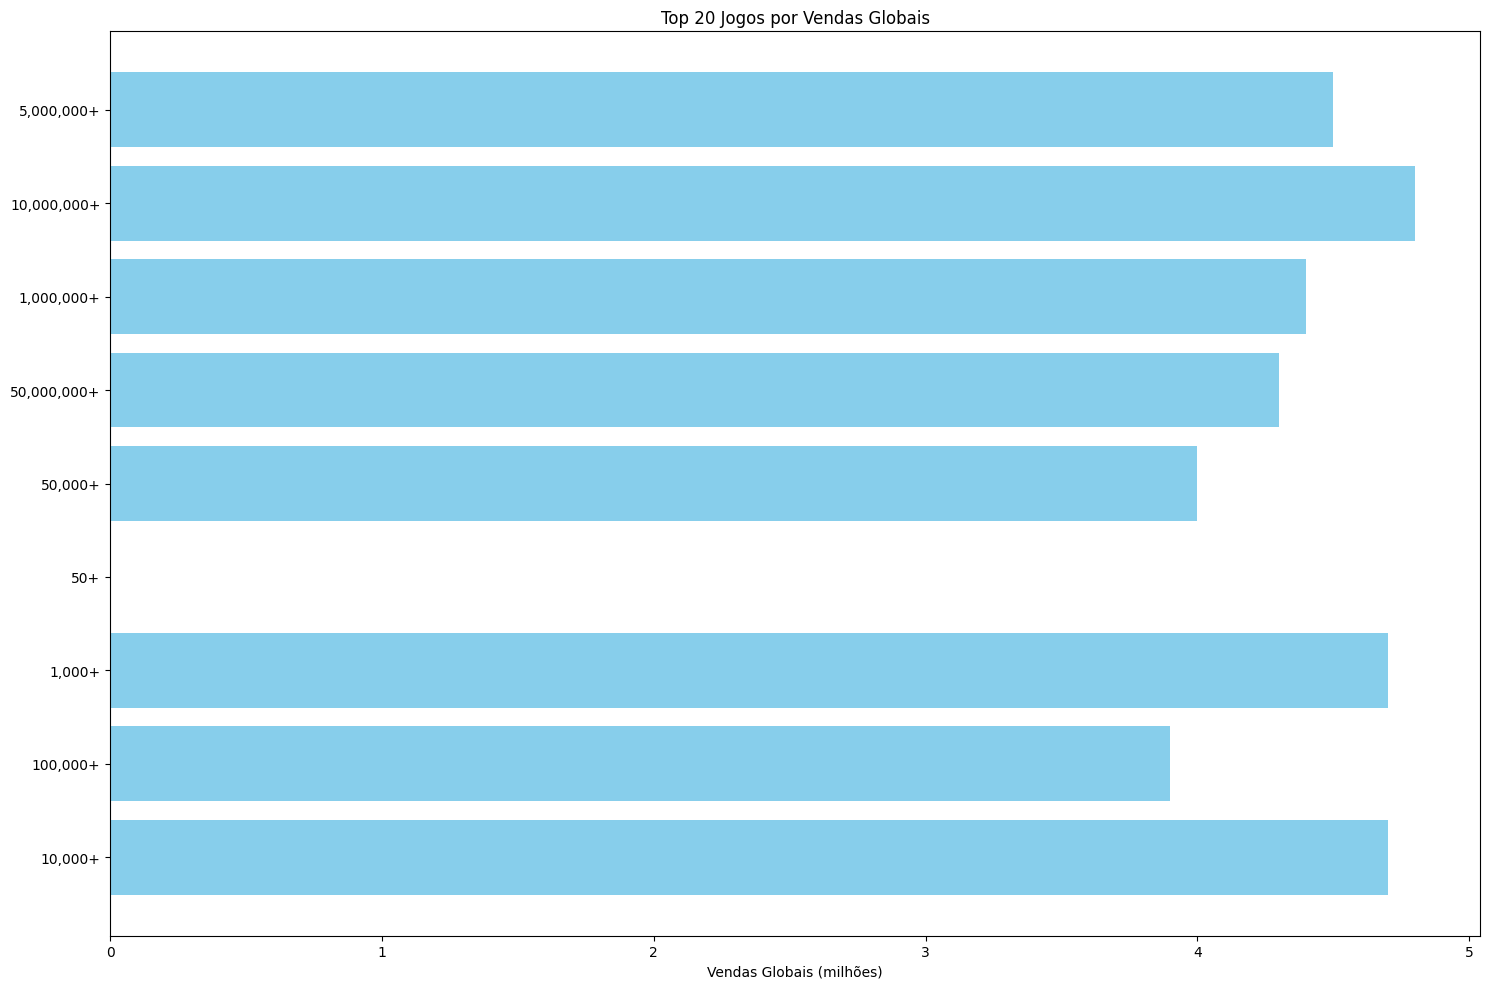

In [23]:
# Top 20 jogos por vendas globais
top10_global = dataset.sort_values(by='Genres', ascending=False).head(20)

plt.figure(figsize=(15, 10))
plt.barh(top10_global['Installs'], top10_global['Rating'], color='skyblue')
plt.xlabel('Vendas Globais (milhões)')
plt.title('Top 20 Jogos por Vendas Globais')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Comparação de vendas por região (stacked bar)
top10_regioes = top10_global[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top10_regioes.set_index('Name', inplace=True)
top10_regioes.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='Set3')
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Região - Top 10 Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')] are in the [columns]"

In [24]:
# Boxplot de vendas globais por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=dataset)
plt.xticks(rotation=45)
plt.title('Distribuição de Vendas Globais por Gênero')
plt.tight_layout()
plt.show()

# Vendas globais por plataforma (Top 10 plataformas)
top_platforms = dataset.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color='coral')
plt.ylabel('Vendas Globais (milhões)')
plt.title('Top 10 Plataformas por Vendas Globais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ValueError: Could not interpret value `Genre` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

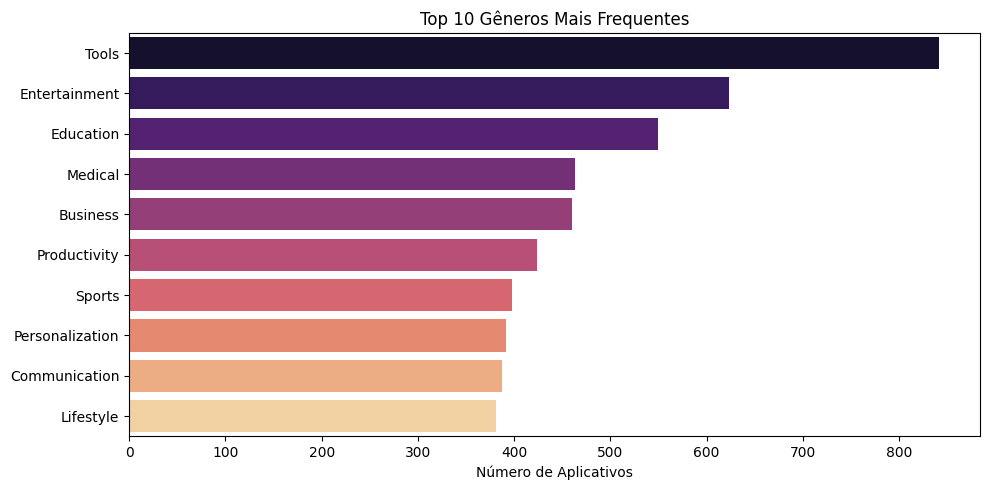

In [ ]:
# Mostrar a lista de gêneros mais frequentes
genres_exploded = dataset['Genres'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [x])
all_genres = [genre for sublist in genres_exploded for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Número de Aplicativos')
plt.tight_layout()
plt.show()


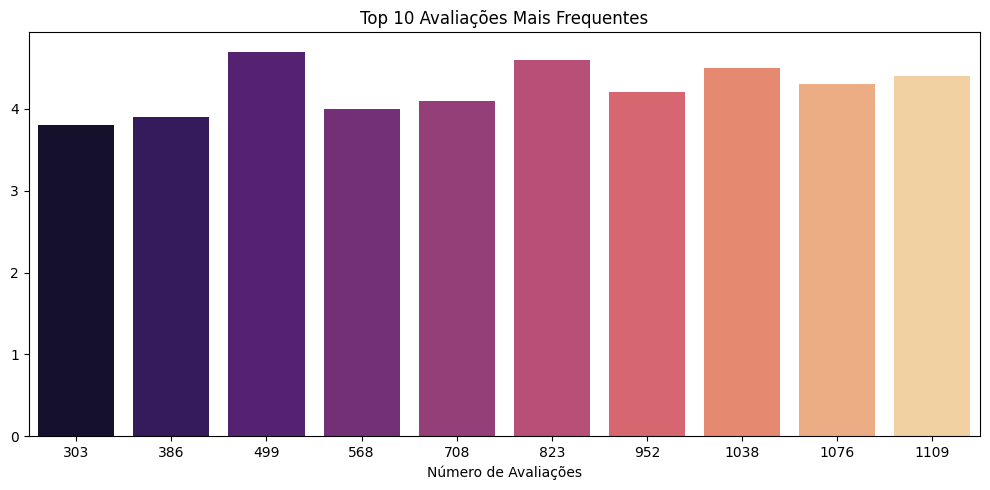

In [ ]:
# Mostrar a lista de publishers mais frequentes
genres_exploded = dataset['Rating'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [x])
all_genres = [genre for sublist in genres_exploded for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title('Top 10 Avaliações Mais Frequentes')
plt.xlabel('Número de Avaliações')
plt.tight_layout()
plt.show()


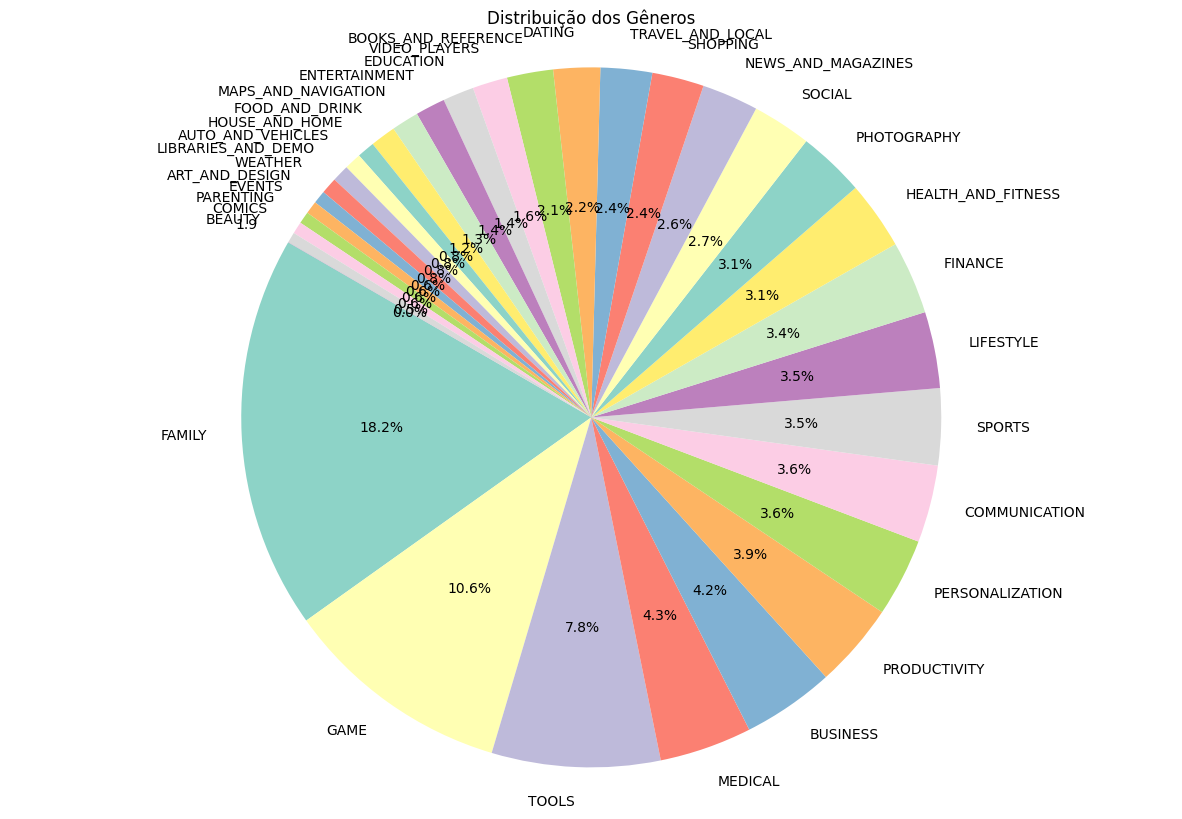

In [ ]:


# Contagem de avaliações
rating_counts = dataset['Category'].value_counts()

# Cores opcionais
colors = plt.cm.Set3.colors[:len(rating_counts)]

# Gráfico de pizza
plt.figure(figsize=(15, 10))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=150, colors=colors)
plt.title('Distribuição dos Gêneros')
plt.axis('equal')  # Deixa o gráfico como um círculo
plt.show()


## Pré-Processamento de dados


In [25]:
# Antes da limpeza, a linha com problema está na posição 10472
print("Linha com erro de desalinhamento (antes de corrigir):")
print(dataset.loc[10472])

Linha com erro de desalinhamento (antes de corrigir):
Unnamed: 0                                          10472
App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                          11-Feb-18
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [26]:
import pandas as pd

# Supondo que 'df' é o seu DataFrame carregado
# Identifica o índice da linha com o valor problemático na coluna 'Category'
index_a_remover = dataset[dataset['Category'] == '1.9'].index

# Remove a linha do DataFrame
dataset.drop(index_a_remover, inplace=True)

# Agora, o DataFrame está limpo dessa linha problemática
print("Linha problemática removida com sucesso. O DataFrame agora tem", len(dataset), "linhas.")

Linha problemática removida com sucesso. O DataFrame agora tem 10840 linhas.


In [27]:
# A linha que causa o erro é a que tem o valor 'Free' na coluna 'Price'.
# Vamos substituí-lo por '0' para que a conversão funcione.
dataset['Price'] = dataset['Price'].str.replace('Free', '0')
dataset['Price'] = dataset['Price'].str.replace('Everyone', '0')
# Agora, remove o '$' e converte a coluna para float.
dataset['Price'] = dataset['Price'].str.replace('$', '', regex=False).str.strip()

dataset['Price'] = dataset['Price'].str.replace('', '0', regex=False).astype(float)


In [28]:
# Visualizando os tipos de dados originais
print("Tipos de dados antes do pré-processamento:\n")
print(dataset.dtypes)

# Pré-processamento da coluna 'Installs'
# Remove os caracteres '+' e ',' e converte para tipo inteiro
dataset['Installs'] = dataset['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Pré-processamento da coluna 'Reviews'
# Já parece estar numérico, mas é sempre bom garantir
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'])


Tipos de dados antes do pré-processamento:

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [29]:
# Remove a linha que contém 'Free' na coluna 'Installs'
dataset = dataset[dataset['Installs'] != 'Free']

In [30]:
# --- Aplicação do One-Hot Encoder ---

# 1. Definir as colunas categóricas para codificar
# A coluna 'App' foi excluída, pois tem muitos valores únicos
# 'Rating' é a variável-alvo, então não deve ser codificada com os recursos
categorical_cols = ["Category", "Type", "Genres"]

# 2. Separar as colunas de recursos (X) e a variável-alvo (y)
X_data = dataset.drop(columns=["App", "Content Rating"])
y_data = dataset["Rating"]

# 3. Criar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 4. Aplicar a transformação nos dados categóricos
# A transformação é aplicada apenas às colunas categóricas definidas
encoded_features = encoder.fit_transform(X_data[categorical_cols])

# 5. Criar um DataFrame com as colunas codificadas
# A ordem deve ser a mesma da lista 'categorical_cols'
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# 6. Combinar os dados codificados com os dados numéricos originais
# Primeiro, removemos as colunas categóricas originais do X_data
X_numeric = X_data.drop(columns=categorical_cols)

# Em seguida, concatenamos o DataFrame numérico com o DataFrame codificado
X_encoded = pd.concat([X_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Verificando o resultado final
print("Shape do DataFrame de features codificado (X_encoded):", X_encoded.shape)
print("\nDataFrame de features codificado (X_encoded):")
print(X_encoded.head())

print("\nDataFrame da variável-alvo (y_data):")
print(y_data.head())


Shape do DataFrame de features codificado (X_encoded): (10840, 164)

DataFrame de features codificado (X_encoded):
   Unnamed: 0  Rating  Reviews  Size  Installs  Price Last Updated  \
0           0     4.1      159   19M     10000    0.0     7-Jan-18   
1           1     3.9      967   14M    500000    0.0    15-Jan-18   
2           2     4.7    87510  8.7M   5000000    0.0     1-Aug-18   
3           3     4.5   215644   25M  50000000    0.0     8-Jun-18   
4           4     4.3      967  2.8M    100000    0.0    20-Jun-18   

          Current Ver   Android Ver  Category_ART_AND_DESIGN  ...  \
0               1.0.0  4.0.3 and up                      1.0  ...   
1               2.0.0  4.0.3 and up                      1.0  ...   
2               1.2.4  4.0.3 and up                      1.0  ...   
3  Varies with device    4.2 and up                      1.0  ...   
4                 1.1    4.4 and up                      1.0  ...   

   Genres_Tools;Education  Genres_Travel & Local 

In [31]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 1:10] # Pega as colunas 2 até 11
y = array[:, 4] # Seleciona a variável target 'Content Review'
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout sem estratificação


# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'
num_particoes = 3
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada sem estratificação

In [32]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (7588, 164)
Dimensões de X_test: (3252, 164)
Dimensões de y_train: (7588,)
Dimensões de y_test: (3252,)


In [33]:
print(X_train.isnull().sum())# Verificar se há valores nulos


Unnamed: 0                                         0
Rating                                          1010
Reviews                                            0
Size                                               0
Installs                                           0
                                                ... 
Genres_Video Players & Editors                     0
Genres_Video Players & Editors;Creativity          0
Genres_Video Players & Editors;Music & Video       0
Genres_Weather                                     0
Genres_Word                                        0
Length: 164, dtype: int64


In [34]:
X_train['Rating'] = X_train['Rating'].fillna(X_train['Rating'].mean())  # Preenchimento dos valores nulos com a média


In [38]:
X_test.isnull().sum()

,0
Unnamed: 0,0
Rating,0
Reviews,0
Size,0
Installs,0
...,...
Genres_Video Players & Editors,0
Genres_Video Players & Editors;Creativity,0
Genres_Video Players & Editors;Music & Video,0
Genres_Weather,0


In [36]:
# 1. Calcular a média da coluna 'Year' APENAS no X_train

mean_year_train = X_train['Rating'].mean()

# 2. Preenchimento dos NaNs na coluna 'Year' do X_train com essa média
X_train['Rating'] = X_train['Rating'].fillna(mean_year_train)

# 3. Preenchimento dos NaNs na coluna 'Year' do X_test com a MESMA média calculada do X_train
X_test['Rating'] = X_test['Rating'].fillna(mean_year_train)

In [ ]:
print(np.any(pd.isna(y_train)))  # Verifique se há NaNs

False


In [ ]:
# Verifique os tipos de dados de X e y
print(y_train.dtype)  # Tipos de dados de X



object


In [ ]:
y_train = np.array(y_train, dtype=np.float64)  # Para valores contínuos (reais)

In [ ]:
print(X_train.dtypes)

Unnamed: 0                                        int64
Rating                                          float64
Reviews                                           int64
Size                                             object
Installs                                          int64
                                                 ...   
Genres_Video Players & Editors                  float64
Genres_Video Players & Editors;Creativity       float64
Genres_Video Players & Editors;Music & Video    float64
Genres_Weather                                  float64
Genres_Word                                     float64
Length: 164, dtype: object


In [ ]:
# Verificando se há colunas com strings após o One-Hot Encoding
print(X_encoded.dtypes)


Unnamed: 0                                        int64
Rating                                          float64
Reviews                                           int64
Size                                             object
Installs                                          int64
                                                 ...   
Genres_Video Players & Editors                  float64
Genres_Video Players & Editors;Creativity       float64
Genres_Video Players & Editors;Music & Video    float64
Genres_Weather                                  float64
Genres_Word                                     float64
Length: 164, dtype: object


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
print(X_encoded.dtypes)


Unnamed: 0                                        int64
Rating                                          float64
Reviews                                           int64
Size                                             object
Installs                                          int64
                                                 ...   
Genres_Video Players & Editors                  float64
Genres_Video Players & Editors;Creativity       float64
Genres_Video Players & Editors;Music & Video    float64
Genres_Weather                                  float64
Genres_Word                                     float64
Length: 164, dtype: object


In [44]:


# Padronizando as variáveis independentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Padronizados X_train : \n\n", X_train_scaled)
print("\nDados Padronizados X_test : \n\n", X_test_scaled)

ValueError: could not convert string to float: '95M'

In [42]:


# Substituir vírgulas por ponto
dataset['Content Rating'] = dataset['Content Rating'].str.replace('+', '')


In [41]:


# Substituir vírgulas por ponto
dataset['Size'] = dataset['Size'].str.replace('.', ',')


In [40]:


# Substituir vírgulas por ponto
dataset['Content Rating'] = dataset['Content Rating'].str.replace('varies with device', '')


In [45]:


# Substituir vírgulas por ponto
dataset['Size'] = dataset['Size'].str.replace('M', '').astype(float)


ValueError: could not convert string to float: '8,7'

In [ ]:
dataset['Name'] = dataset['Name'].astype('category')

# Aplicando One-Hot Encoding
df_one_hot = pd.get_dummies(dataset, columns=['Name'])



O SelectKBest foi utilizado para escolher os melhores atributos. Os atributos selecionados foram Name_Wii_Sports, Name_Wii_Sports Resort, Publisher Nintendo, NA_Sales, JP_Sales e Other_Sales

In [46]:
# 5. SelectKBest
best_var = SelectKBest(score_func=f_regression, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
# O fit é feito no array NumPy, mas ele ainda consegue calcular os scores.
fit = best_var.fit(X_train_scaled, y_train)

# Reduz X para os atributos selecionados
X_train_selected = fit.transform(X_train_scaled)
X_test_selected = fit.transform(X_test_scaled)

# ---
# Resultados
print('\nNúmero original de atributos (após OHE e padronização):', X_train_scaled.shape[1])
print('\nNúmero reduzido de atributos:', X_train_selected.shape[1])

np.set_printoptions(precision=3)
print("\nScores dos Atributos:", fit.scores_)

#  selected_features_names = X_train_scaled.columns[selected_indices]
# X_train_scaled é um array NumPy, não tem .columns.
# Precisamos dos nomes das colunas ANTES da padronização (do X_train_processed)

# Obtém os nomes das colunas de X_train_processed (que é um DataFrame)
all_feature_names = X_train.columns

selected_indices = fit.get_support(indices=True) # Obtém os índices dos atributos selecionados
# uso dos nomes das colunas do DataFrame original (X_train_processed)
selected_features_names = all_feature_names[selected_indices]

print("\nAtributos Selecionados:", selected_features_names.tolist())

# Para manter X_train_selected e X_test_selected como DataFrames
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features_names, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features_names, index=X_test.index)

print(f"\nDimensões de X_train_selected: {X_train_selected.shape}")
print(f"Dimensões de X_test_selected: {X_test_selected.shape}")

NameError: name 'X_train_scaled' is not defined